
## Домашнее задание к лекции "Базовые понятия статистики"
**Обязательная часть**

Будем осуществлять работу с непростым набором данных о состоянии здоровья лошадей, испытывающих кишечные колики.




In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('horse_data.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2,1,530101,38.50,66,28,3,3,?,2,...,45.00,8.40,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,?,?,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,?,?,6,2,...,74.00,7.40,?,?,2,2,4300,0,0,2


**Задание 1. Базовое изучение**

Изучить представленный набор данных на основе описания его столбцов и выбрать 8 столбцов для дальнейшего изучения (среди них должны быть как числовые, так и категориальные). Провести расчет базовых метрик для них, кратко описать результаты.


In [4]:
horses = df[[0,1,3,4,7,10,19,23]].rename(columns={0: 'Surgery', 1: 'Age', 3: 'Rectal temperature', 4: 'pulse', 7: 'peripheral pulse', 10: 'pain level', 19: 'total protein', 23: 'outcome' })
horses = horses.apply(lambda x: x.replace('?',''))
horses.head()

,Surgery,Age,Rectal temperature,pulse,peripheral pulse,pain level,total protein,outcome
0,2,1,38.50,66,3,5,8.40,2
1,1,1,39.2,88,,3,85,2
2,2,1,38.30,40,1,3,6.70,2
3,1,9,39.10,164,1,2,7.20,1
4,2,1,37.30,104,,,7.40,2


In [5]:
for column in horses.columns:
    horses[column] = pd.to_numeric(horses[column])
horses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Surgery             299 non-null    float64
 1   Age                 300 non-null    int64  
 2   Rectal temperature  240 non-null    float64
 3   pulse               276 non-null    float64
 4   peripheral pulse    231 non-null    float64
 5   pain level          245 non-null    float64
 6   total protein       267 non-null    float64
 7   outcome             300 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 18.9 KB


In [6]:
#В датасете ошибка по возрасту: в описании дается 2 как молодая лошадь, а в датасете - 9
horses['Age'] = horses.Age.apply(lambda age: 2 if age == 9 else age)

In [7]:
horses.head()

,Surgery,Age,Rectal temperature,pulse,peripheral pulse,pain level,total protein,outcome
0,2.0,1,38.5,66.0,3.0,5.0,8.4,2
1,1.0,1,39.2,88.0,NaN,3.0,85.0,2
2,2.0,1,38.3,40.0,1.0,3.0,6.7,2
3,1.0,2,39.1,164.0,1.0,2.0,7.2,1
4,2.0,1,37.3,104.0,NaN,NaN,7.4,2


In [19]:
#Провести расчет базовых метрик для них
print('Средняя:')
print(horses.mean())
print('---------')
print('Медиана:')
print(horses.median())
print('---------')
print('Мода:')
for column_name in horses.columns:
    print(column_name, horses[column_name].mode()[0])


Средняя:
Surgery                1.397993
Age                    1.080000
Rectal temperature    38.167917
pulse                 71.913043
peripheral pulse       2.017316
pain level             2.951020
total protein         24.456929
outcome                1.363333
dtype: float64
---------
Медиана:
Surgery                1.0
Age                    1.0
Rectal temperature    38.2
pulse                 64.0
peripheral pulse       2.0
pain level             3.0
total protein          7.5
outcome                1.0
dtype: float64
---------
Мода:
Surgery 1.0
Age 1
Rectal temperature 38.0
pulse 48.0
peripheral pulse 1.0
pain level 3.0
total protein 6.5
outcome 1


## Выводы
    1) Surgery - Большая часть лошадей имела операции
    2) Age - Практически все лошади - взрослые особи (старше 6 месяцев)
    3) Rectal temperature - "Средняя по больнице" чуть выше нормы, что говорит о том, что температура у лошадей завышена
    4) Pulse - Средняя пульса значительно выше медианного или модального значения. Можно сделать вывод об ошибке в показаниях, либ какие-то лошади имели очень высокий пульс (разберемся с этим дальше)
    5) peripheral pulse - пульс всех лошадей был выше нормы
    6) total protein - Опять же, средняя по белку сильно выше модального или медианного значения. Будем смотреть почему. Модальное и медианное значения находятся в пределах нормы
    7) outcome - Данные говорят о том, что большинство лошадей все же выжило
    8) pain level - данные говорят, что лошади испытывали боль, но не острую (возможно, отсюда и высокий пульс)

In [21]:
horses['pulse'].unique()

array([ 66.,  88.,  40., 164., 104.,  nan,  48.,  60.,  80.,  90.,  72.,
        42.,  92.,  76.,  96., 128.,  64., 110., 130., 108., 100., 112.,
        52., 146., 150., 120., 140.,  84.,  46., 114., 160.,  54.,  56.,
        38.,  98.,  50.,  44.,  70.,  78.,  49.,  30., 136., 132.,  65.,
        86., 129.,  68.,  36.,  45., 124., 184.,  75.,  82.])

In [22]:
horses['total protein'].unique()

array([ 8.4, 85. ,  6.7,  7.2,  7.4,  nan,  7. ,  8.3,  6.2,  6. ,  7.8,
        6.1, 81. ,  6.8,  8.7, 70. , 65. ,  5.5, 76. ,  7.5,  8.2,  6.6,
        8.6, 80. ,  6.5,  8.5, 67. , 69. ,  9.1,  7.7,  6.4,  8.1,  5.9,
        8. , 82. , 72. , 74. ,  6.3,  7.6,  4.9, 57. , 68. , 77. ,  8.9,
        5.7,  4.5, 61. , 86. , 60. , 66. ,  5.3,  7.3, 64. , 58. , 56. ,
       75. , 10.2, 62. ,  7.9, 73. , 71. , 63. , 46. ,  5.8, 53. ,  4.7,
       59. , 55. , 89. , 51. ,  4. , 11. ,  8.8, 50. , 54. ,  6.9,  4.6,
       13. ,  7.1,  3.3,  9. ,  5. ])

**Задание 2. Работа с выбросами**

В выбранных числовых столбцах найти выбросы, выдвинуть гипотезы об их причинах и проинтерпретировать результаты. Принять и обосновать решение о дальнейшей работе с ними.


In [58]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

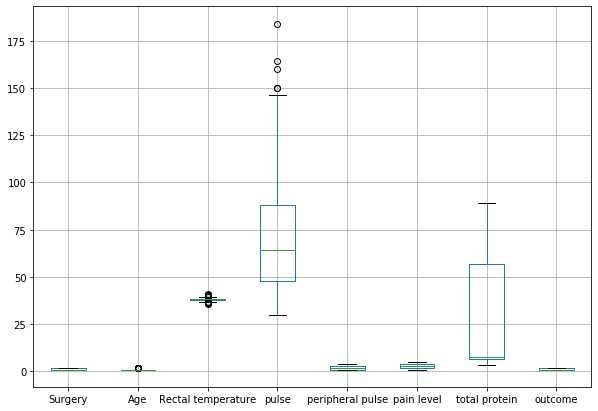

In [59]:
# с помощью boxplot найдем явные выбросы
horses.boxplot()

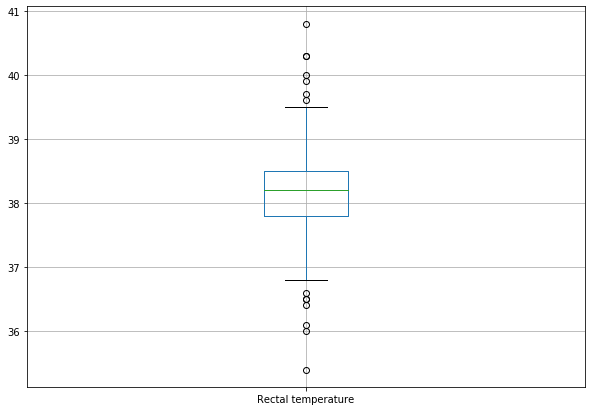

In [62]:
horses.boxplot(column=['Rectal temperature'])

In [ ]:
# Видим, что данные по пульсу и температуре имеют выбросы. Попробуем от них избавиться

In [64]:
#pulse
q1 = horses['pulse'].quantile(0.25)
q3 = horses['pulse'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
horses = horses[horses['pulse'].between(lower_bound, upper_bound, inclusive=True)]
horses

#Rectal temperature
q1 = horses['Rectal temperature'].quantile(0.25)
q3 = horses['Rectal temperature'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
horses = horses[horses['Rectal temperature'].between(lower_bound, upper_bound, inclusive=True)]
horses

,Surgery,Age,Rectal temperature,pulse,peripheral pulse,pain level,total protein,outcome
0,2.0,1,38.5,66.0,3.0,5.0,8.4,2
1,1.0,1,39.2,88.0,NaN,3.0,85.0,2
2,2.0,1,38.3,40.0,1.0,3.0,6.7,2
4,2.0,1,37.3,104.0,NaN,NaN,7.4,2
6,1.0,1,37.9,48.0,1.0,3.0,7.0,1
...,...,...,...,...,...,...,...,...
292,1.0,1,37.0,66.0,3.0,4.0,6.9,1
294,2.0,1,38.5,40.0,1.0,2.0,67.0,2
296,2.0,1,37.2,72.0,2.0,4.0,NaN,1
297,1.0,1,37.5,72.0,3.0,4.0,6.8,1


In [66]:
print('Средняя:')
print(horses.mean())
print('---------')
print('Медиана:')
print(horses.median())
print('---------')
print('Мода:')
for column_name in horses.columns:
    print(column_name, horses[column_name].mode()[0])

Средняя:
Surgery                1.420561
Age                    1.065116
Rectal temperature    38.135814
pulse                 66.888372
peripheral pulse       1.794118
pain level             2.689266
total protein         26.550000
outcome                1.437209
dtype: float64
---------
Медиана:
Surgery                1.0
Age                    1.0
Rectal temperature    38.1
pulse                 60.0
peripheral pulse       1.0
pain level             3.0
total protein          7.5
outcome                1.0
dtype: float64
---------
Мода:
Surgery 1.0
Age 1
Rectal temperature 38.0
pulse 48.0
peripheral pulse 1.0
pain level 3.0
total protein 7.0
outcome 1


Показатели стали ближе друг к другу. Вероятнее всего, выбросы не были ошибочными показателями, просто у ряда лошадей были небольшие отклонения от общей массы. 

**Задание 3. Работа с пропусками**

Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе работы с пропусками по каждому столбцу, сформировать датафрейм, в котором пропуски будут отсутствовать.


In [77]:
#Заново создаем Датафрейм
df = pd.read_csv('horse_data.csv', header=None)
horses = df[[0,1,3,4,7,10,19,23]].rename(columns={0: 'Surgery', 1: 'Age', 3: 'Rectal temperature', 4: 'pulse', 7: 'peripheral pulse', 10: 'pain level', 19: 'total protein', 23: 'outcome' })
horses = horses.apply(lambda x: x.replace('?',''))
for column in horses.columns:
    horses[column] = pd.to_numeric(horses[column])
horses['Age'] = horses.Age.apply(lambda age: 2 if age == 9 else age)
horses()

TypeError: 'DataFrame' object is not callable

In [69]:
#Считаем количество пропусков
for col in horses.columns:
    pct_missing = horses[col].isnull().mean()
    print(f'{col} - {pct_missing :.1%}')

Surgery - 0.3%
Age - 0.0%
Rectal temperature - 20.0%
pulse - 8.0%
peripheral pulse - 23.0%
pain level - 18.3%
total protein - 11.0%
outcome - 0.0%


Мы можем заполнить количественные значения (температура, пульс и белок) средними значениями. Качественные значения (жива лошадь или нет, сколько ей лет) мы не можем 

In [97]:
horses_filled = horses
horses_filled['pulse'].fillna(horses['pulse'].mean(), inplace=True)
horses_filled['Rectal temperature'].fillna(horses['Rectal temperature'].mean(), inplace=True)
horses_filled['total protein'].fillna(horses['total protein'].mean(), inplace=True)
horses_filled = horses_filled.dropna()
horses_filled.head(10)

,Surgery,Age,Rectal temperature,pulse,peripheral pulse,pain level,total protein,outcome
0,2.0,1,38.500000,66.000000,3.0,5.0,8.400000,2
2,2.0,1,38.300000,40.000000,1.0,3.0,6.700000,2
3,1.0,2,39.100000,164.000000,1.0,2.0,7.200000,1
5,2.0,1,38.167917,71.913043,1.0,2.0,24.456929,2
6,1.0,1,37.900000,48.000000,1.0,3.0,7.000000,1
8,2.0,1,38.167917,80.000000,4.0,4.0,6.200000,1
10,1.0,1,38.100000,66.000000,3.0,3.0,6.000000,1
12,1.0,1,37.200000,42.000000,1.0,3.0,7.000000,2
13,2.0,2,38.000000,92.000000,1.0,1.0,6.100000,2
14,1.0,1,38.200000,76.000000,1.0,3.0,81.000000,1


In [93]:
horses_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 0 to 298
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Surgery             211 non-null    float64
 1   Age                 211 non-null    int64  
 2   Rectal temperature  211 non-null    float64
 3   pulse               211 non-null    float64
 4   peripheral pulse    211 non-null    float64
 5   pain level          211 non-null    float64
 6   total protein       211 non-null    float64
 7   outcome             211 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 14.8 KB


In [95]:
#Считаем количество пропусков
for col in horses_filled.columns:
    pct_missing = horses_filled[col].isnull().mean()
    print(f'{col} - {pct_missing :.1%}')

Surgery - 0.0%
Age - 0.0%
Rectal temperature - 0.0%
pulse - 0.0%
peripheral pulse - 0.0%
pain level - 0.0%
total protein - 0.0%
outcome - 0.0%


In [99]:
#Итого остается 211 значений
print('Средняя:')
print(horses_filled.mean())
print('---------')
print('Медиана:')
print(horses_filled.median())
print('---------')
print('Мода:')
for column_name in horses_filled.columns:
    print(column_name, horses_filled[column_name].mode()[0])


Средняя:
Surgery                1.426540
Age                    1.066351
Rectal temperature    38.178582
pulse                 72.278178
peripheral pulse       2.000000
pain level             2.909953
total protein         22.849341
outcome                1.360190
dtype: float64
---------
Медиана:
Surgery                1.000000
Age                    1.000000
Rectal temperature    38.167917
pulse                 68.000000
peripheral pulse       1.000000
pain level             3.000000
total protein          7.500000
outcome                1.000000
dtype: float64
---------
Мода:
Surgery 1.0
Age 1
Rectal temperature 38.16791666666669
pulse 48.0
peripheral pulse 1.0
pain level 3.0
total protein 24.456928838951317
outcome 1
